# Predict the percentage of an student based on the no. of study hours.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Reading the data

In [3]:
data=pd.read_csv("student_scores - student_scores.csv")
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
data.isna().sum() # no null data

Hours     0
Scores    0
dtype: int64

Text(0.5, 1.0, 'Hours studied vs percentage scored ')

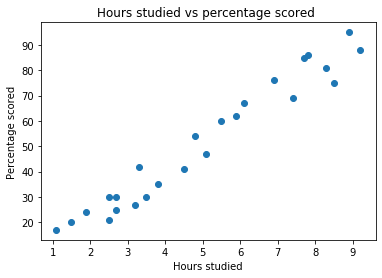

In [6]:
# Plotting the distribution of scores with respect to the hours studied
plt.scatter(x='Hours', y='Scores',data=data)
plt.xlabel("Hours studied")
plt.ylabel("Percentage scored")
plt.title("Hours studied vs percentage scored ")


# Preparing the data

In [9]:
X = np.array(data["Hours"])
y = np.array(data["Scores"])

In [10]:
X=X.reshape(-1,1)


In [15]:
# splitting the data into two sets X_train and X_test
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=141) 

In [16]:
X_test.shape

(5, 1)

# Training the algorithms

In [17]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [20]:
lr.fit(X_train,y_train)
score=lr.score(X_train,y_train)
print("The accuracy score is ",score*100,"%")

The accuracy score is  95.9362552255804 %


In [21]:
slope=lr.coef_
intercept=lr.intercept_

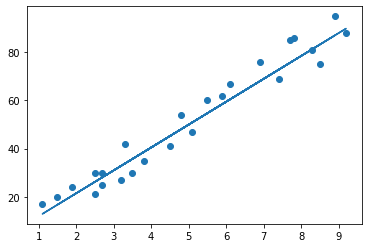

In [22]:

plt.scatter(X,y)
line=slope*X+intercept
# plotting the regression line
plt.plot(X,line)

# Making Predictions

In [23]:
y_pred=lr.predict(X_test)


In [24]:
y_pred

array([75.63250952, 28.06144465, 60.40976876, 33.76997244, 76.58393082])

In [25]:
y_test

array([85, 30, 67, 42, 86])

In [26]:
df = pd.DataFrame=({'Actual': y_test.tolist(), 'Predicted': y_pred.tolist()})  
df 

{'Actual': [85, 30, 67, 42, 86],
 'Predicted': [75.6325095227513,
  28.06144465107937,
  60.40976876381628,
  33.76997243568,
  76.58393082018473]}

In [29]:
# be predicted score if a student studies for 9.25 hrs/ day
hours = 9.25
hours=np.array(hours).reshape(-1,1)
pred = lr.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred))

No of Hours = [[9.25]]
Predicted Score = [90.37953963]


# Evaluation

In [171]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('R2 score:', metrics.r2_score(y_test, y_pred)) 


Mean Absolute Error: 7.1084747612976615
R2 score: 0.8859300176440567
